## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

In [2]:
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes mídias (<i>TV</i>, <i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [3]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [4]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [5]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

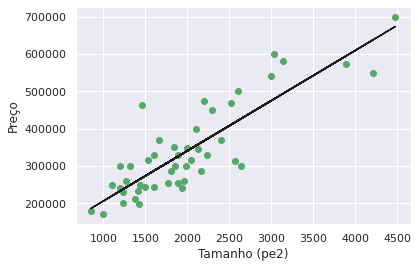

In [6]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [7]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [8]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.6320180251851149


---

# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




## Regressão utilizando o **número de quartos**

In [9]:
X_quartos = dados_por.loc[:,['quartos']]
y_por = dados_por.loc[:,['preco']]

In [10]:
reg = LinearRegression().fit(X_quartos, y_por)
reg

LinearRegression()

### Avaliando o modelo

Text(0, 0.5, 'Preço')

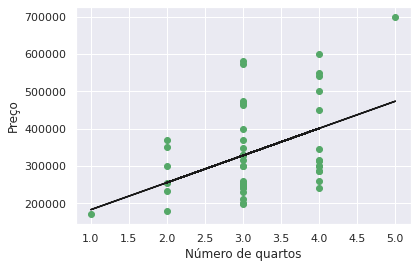

In [11]:
plt.scatter(X_quartos, y_por, color='g')
plt.plot(X_quartos, reg.predict(X_quartos),color='k')
plt.xlabel('Número de quartos')
plt.ylabel('Preço')

In [12]:
rss = calc_rss(y_por,reg.predict(X_quartos))
r2 = calc_r2(y_por,reg.predict(X_quartos))
print(rss)
print(r2)

578535325112.5249
-3.112607855431998


In [13]:
np.std(y_por)

preco    123702.536006
dtype: float64

### Lidando com outliers

In [14]:
dados_por_sem_out = dados_por.loc[(dados_por['quartos']>1) & (dados_por['quartos']<5)]

In [15]:
X_so = dados_por_sem_out.loc[:,['quartos']]
y_so = dados_por_sem_out.loc[:,['preco']]

reg = LinearRegression().fit(X_so,y_so)
reg

LinearRegression()

Text(0, 0.5, 'Preço')

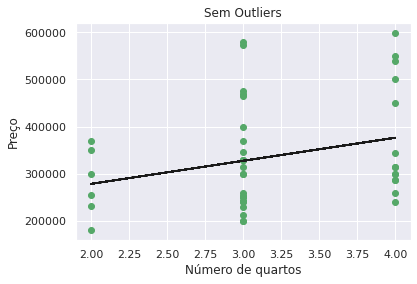

In [16]:
plt.scatter(X_so, y_so,color='g')
plt.plot(X_so, reg.predict(X_so),color='k')
plt.title('Sem Outliers')
plt.xlabel('Número de quartos')
plt.ylabel('Preço')

In [17]:
rss = calc_rss(y_so,reg.predict(X_so))
r2 = calc_r2(y_so,reg.predict(X_so))
print(rss)
print(r2)

515594475257.64
-10.582451836393671


In [18]:
np.std(y_so)

preco    111565.587699
dtype: float64

**Resposta:**  
Mesmo tirando os *outliers* o número de quartos não se mostra uma boa variável para perver os preços das casas. Na verdade, ele se torna ainda pior, comparado com os dados completos O fato dessa variável ser discreta, e não ter muita linearidade com relação ao preço a torna uma má preditora.

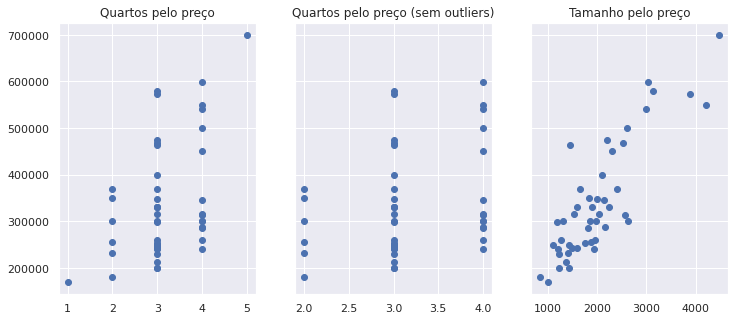

In [19]:
f, axs = plt.subplots(1, 3, sharey=True, figsize =(12,5))
axs[0].scatter(X_quartos['quartos'],y['preco'])
axs[0].set_title('Quartos pelo preço')
axs[1].scatter(X_so['quartos'],y_so['preco'])
axs[1].set_title('Quartos pelo preço (sem outliers)')
axs[2].scatter(X['tamanho'],y['preco'])
axs[2].set_title('Tamanho pelo preço')

plt.show()

---

# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [20]:
dados_adv.columns.tolist()

['TV', 'radio', 'newspaper', 'sales']

In [21]:
df_adv_model_test = pd.DataFrame(columns=['Mídia', 'RSS', 'R2'])

In [22]:
df_adv_model_test['Mídia'] = dados_adv.columns.tolist()[:3]
df_adv_model_test

,Mídia,RSS,R2
0,TV,NaN,NaN
1,radio,NaN,NaN
2,newspaper,NaN,NaN


## Variável dependente

In [23]:
y_adv = dados_adv.loc[:,['sales']]

## Variáveis independentes

In [24]:
X_TV = dados_adv.loc[:,['TV']]
X_radio = dados_adv.loc[:,['radio']]
X_newspaper = dados_adv.loc[:,['newspaper']]

## Cálculo dos indicadores RSS e $R^2$ para cada variável

In [25]:
reg_TV = LinearRegression().fit(X_TV, y_adv)

reg_radio = LinearRegression().fit(X_radio, y_adv)

reg_newspaper = LinearRegression().fit(X_newspaper, y_adv)

In [26]:
rss_TV = calc_rss(y_adv,reg_TV.predict(X_TV))
r2_TV = calc_r2(y_adv,reg_TV.predict(X_TV))

rss_radio = calc_rss(y_adv,reg_radio.predict(X_radio))
r2_radio = calc_r2(y_adv,reg_radio.predict(X_radio))

rss_newspaper = calc_rss(y_adv,reg_newspaper.predict(X_newspaper))
r2_newspaper = calc_r2(y_adv,reg_newspaper.predict(X_newspaper))

In [27]:
df_adv_model_test.loc[0:0,'RSS'] = rss_TV
df_adv_model_test.loc[0:0,'R2'] = r2_TV

df_adv_model_test.loc[1:1,'RSS'] = rss_radio
df_adv_model_test.loc[1:1,'R2'] = r2_radio

df_adv_model_test.loc[2:2,'RSS'] = rss_newspaper
df_adv_model_test.loc[2:2,'R2'] = r2_newspaper

In [28]:
df_adv_model_test

,Mídia,RSS,R2
0,TV,2102.530583,0.365679
1,radio,3618.479549,-1.011754
2,newspaper,5134.804544,-17.186329


## Visualização da linearidade

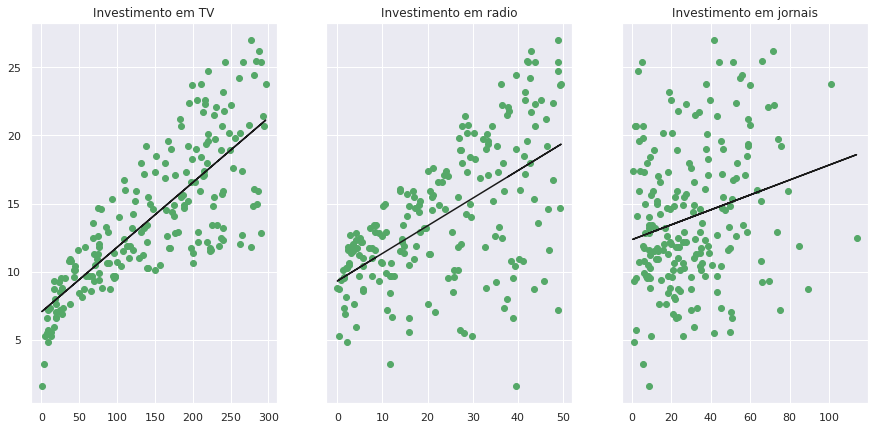

In [38]:
f, axs = plt.subplots(1, 3, sharey=True, figsize =(15,7))
axs[0].scatter(X_TV, y_adv, color='g')
axs[0].plot(X_TV, reg_TV.predict(X_TV),color='k')
axs[0].set_title('Investimento em TV')
axs[1].scatter(X_radio, y_adv, color='g')
axs[1].plot(X_radio, reg_radio.predict(X_radio),color='k')
axs[1].set_title('Investimento em radio')
axs[2].scatter(X_newspaper, y_adv, color='g')
axs[2].plot(X_newspaper, reg_newspaper.predict(X_newspaper),color='k')
axs[2].set_title('Investimento em jornais')

plt.show()

**Resposta:**  
Como já se pode imaginar, a TV teve melhor correspondência nas predições das vendas, pois tem uma relação mais linear com a essa. Os jornais (newspaper), por outro lado, tem uma relação bem disperça e as predições usando essa variável não são muito confiáveis.

---

# Exercício 3

1. Compare os resultados das duas regressões com a implemtação do KNN-Regressor visto na aula passada.

1. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?


### Bibliotecas do Scikit-learn

In [37]:
from sklearn import preprocessing

In [38]:
from sklearn.neighbors import KNeighborsRegressor

## Portland_housePrices

### Variável dependente

In [39]:
y_por = dados_por.loc[:,['preco']]

### Variáveis independentes

In [40]:
X_tam = dados_por.loc[:,['tamanho']]

In [42]:
X_quartos.head()

,quartos
0,3
1,3
2,3
3,2
4,4


## Buscando k adequado

In [44]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

### Tamanho

In [66]:
rmse_val = [] #to store rmse values for different k
x_train = X_tam
x_test = X_tam
y_train = y_por
y_test = y_por

for K in range(1, 20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

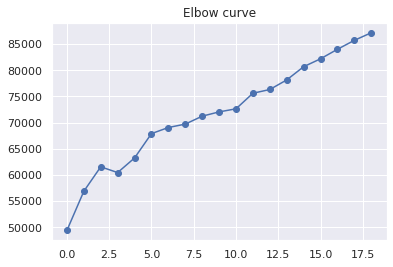

In [75]:
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot(curve, '-o')

plt.title('Elbow curve')

plt.show()

In [137]:
x_train = X_tam
x_test = X_tam
y_train = y_por
y_test = y_por
y = y_por

rss_tam = []
r2_tam = []
for K in range(1, 6):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    rss = calc_rss(y, pred)
    r2 = calc_r2(y, pred)
    rss_tam.append(rss)
    r2_tam.append(r2)

In [138]:
df_por_knn_test = pd.DataFrame(columns=['K', 'RSS', 'R2'])

In [139]:
df_por_knn_test['K'] = range(1,6)
df_por_knn_test['RSS'] = rss_tam
df_por_knn_test['R2'] = r2_tam

In [140]:
df_por_knn_test

,K,RSS,R2
0,1,1.146283e+11,0.813913
1,2,1.520126e+11,0.748672
2,3,1.780240e+11,0.621107
3,4,1.717115e+11,0.617299
4,5,1.879520e+11,0.532806


### Quartos

In [131]:
rmse_val = [] #to store rmse values for different k
x_train = X_quartos
x_test = X_quartos
y_train = y_por
y_test = y_por

for K in range(1, 20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

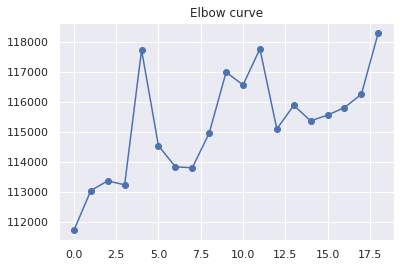

In [132]:
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot(curve, '-o')

plt.title('Elbow curve')

plt.show()

In [141]:
x_train = X_quartos
x_test = X_quartos
y_train = y_por
y_test = y_por
y = y_por

rss_quartos = []
r2_quartos = []
for K in range(1, 10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    rss = calc_rss(y, pred)
    r2 = calc_r2(y, pred)
    rss_tam.append(rss)
    r2_tam.append(r2)

In [142]:
df_por_knn_test = pd.DataFrame(columns=['K', 'RSS', 'R2'])

In [143]:
df_por_knn_test['K'] = range(1,10)
df_por_knn_test['RSS'] = rss_quartos
df_por_knn_test['R2'] = r2_quartos

In [136]:
df_por_knn_test

,K,RSS,R2
0,1,5.864944e+11,-2.062947
1,2,6.005530e+11,-5.377592
2,3,6.039998e+11,-8.753878
3,4,6.025686e+11,-5.456557
4,5,6.514176e+11,-2.190187
5,6,6.165737e+11,-2.790791
6,7,6.090112e+11,-3.794589
7,8,6.086572e+11,-5.218670
8,9,6.210792e+11,-5.388100


## Advertising

### Variável dependente

In [107]:
y_adv.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


### Variáveis independentes

In [111]:
X_TV.head()

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


In [112]:
X_radio.head()

,radio
1,37.8
2,39.3
3,45.9
4,41.3
5,10.8


In [113]:
X_newspaper.head()

,newspaper
1,69.2
2,45.1
3,69.3
4,58.5
5,58.4


### TV

In [144]:
rmse_val = [] #to store rmse values for different k
x_train = X_TV
x_test = X_TV
y_train = y_adv
y_test = y_adv

for K in range(1, 20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

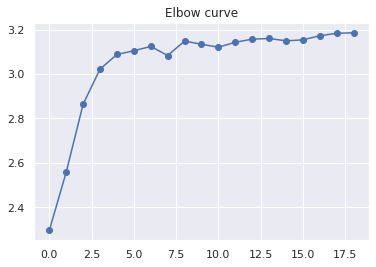

In [145]:
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot(curve, '-o')

plt.title('Elbow curve')

plt.show()

In [152]:
x_train = X_TV
x_test = X_TV
y_train = y_adv
y_test = y_adv
y = y_adv

rss_TV = []
r2_TV = []
for K in range(1, 10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    rss = calc_rss(y, pred)
    r2 = calc_r2(y, pred)
    rss_TV.append(rss)
    r2_TV.append(r2)

In [153]:
df_adv_knn_test = pd.DataFrame(columns=['K', 'RSS', 'R2'])

In [154]:
df_adv_knn_test['K'] = range(1,10)
df_adv_knn_test['RSS'] = rss_TV
df_adv_knn_test['R2'] = r2_TV

In [156]:
df_adv_knn_test

,K,RSS,R2
0,1,1053.625000,0.753921
1,2,1308.371111,0.668715
2,3,1640.826250,0.530017
3,4,1827.236400,0.478854
4,5,1908.013056,0.466330
5,6,1928.759184,0.450680
6,7,1953.012656,0.427263
7,8,1902.233827,0.431352
8,9,1983.065500,0.430511


### radio

In [157]:
rmse_val = [] #to store rmse values for different k
x_train = X_radio
x_test = X_radio
y_train = y_adv
y_test = y_adv

for K in range(1, 20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

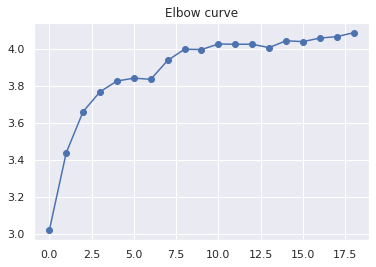

In [158]:
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot(curve, '-o')

plt.title('Elbow curve')

plt.show()

In [160]:
x_train = X_radio
x_test = X_radio
y_train = y_adv
y_test = y_adv
y = y_adv

rss_radio = []
r2_radio = []
for K in range(1, 10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    rss = calc_rss(y, pred)
    r2 = calc_r2(y, pred)
    rss_radio.append(rss)
    r2_radio.append(r2)

In [161]:
df_adv_knn_test = pd.DataFrame(columns=['K', 'RSS', 'R2'])

In [162]:
df_adv_knn_test['K'] = range(1,10)
df_adv_knn_test['RSS'] = rss_radio
df_adv_knn_test['R2'] = r2_radio

In [163]:
df_adv_knn_test

,K,RSS,R2
0,1,1822.702500,0.498380
1,2,2363.855556,0.286144
2,3,2680.270000,0.075889
3,4,2839.080400,-0.095424
4,5,2927.536111,-0.237820
5,6,2951.430612,-0.193612
6,7,2941.473594,-0.213751
7,8,3100.283951,-0.295677
8,9,3196.265000,-0.412606


### newspaper

In [164]:
rmse_val = [] #to store rmse values for different k
x_train = X_newspaper
x_test = X_newspaper
y_train = y_adv
y_test = y_adv

for K in range(1, 20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

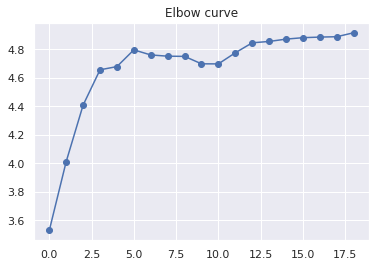

In [165]:
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot(curve, '-o')

plt.title('Elbow curve')

plt.show()

In [167]:
x_train = X_newspaper
x_test = X_newspaper
y_train = y_adv
y_test = y_adv
y = y_adv

rss_newspaper = []
r2_newspaper = []
for K in range(1, 10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    rss = calc_rss(y, pred)
    r2 = calc_r2(y, pred)
    rss_newspaper.append(rss)
    r2_newspaper.append(r2)

In [168]:
df_adv_knn_test = pd.DataFrame(columns=['K', 'RSS', 'R2'])

In [169]:
df_adv_knn_test['K'] = range(1,10)
df_adv_knn_test['RSS'] = rss_newspaper
df_adv_knn_test['R2'] = r2_newspaper

In [170]:
df_adv_knn_test

,K,RSS,R2
0,1,2491.682500,0.090957
1,2,3219.995556,-0.762649
2,3,3886.916250,-1.801344
3,4,4335.615600,-2.596942
4,5,4377.733889,-2.565022
5,6,4599.888776,-2.923800
6,7,4531.948750,-3.229725
7,8,4515.468395,-3.400848
8,9,4512.720500,-3.474347
